In [14]:
import tensorflow as tf
import numpy as np

In [2]:
sess=tf.Session()   
new_saver = tf.train.import_meta_graph('model.ckpt.meta')
new_saver.restore(sess, 'model.ckpt')
    
graph = tf.get_default_graph()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model.ckpt


In [3]:
print(graph)

In [3]:
[(n.op, n.name) for n in tf.get_default_graph().as_graph_def().node if "Variable" in n.op]

[('VariableV2', 'Variable'),
 ('VariableV2', 'Variable_1'),
 ('VariableV2', 'Variable_2')]

In [7]:
vec = graph.get_tensor_by_name('Variable:0')

In [8]:
norm = tf.sqrt(tf.reduce_sum(tf.square(vec), 1, keep_dims=True))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
normalized_embeddings = vec / norm

In [11]:
final_embeddings = normalized_embeddings.eval(session=sess)

In [14]:
final_embeddings.shape

(100000, 64)

In [1]:
import tensorflow as tf
import numpy as np
import math
import collections
import random
import pickle
import glob,os
from tempfile import gettempdir
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
PATH_TO_STORE_THE_DICTIONARY="C:/Users/admin/chenw2k/dict_file_c"

In [6]:
with open(PATH_TO_STORE_THE_DICTIONARY , "rb") as f:
    [count,dictionary,reverse_dictionary,vocabulary_size] = pickle.load(f)

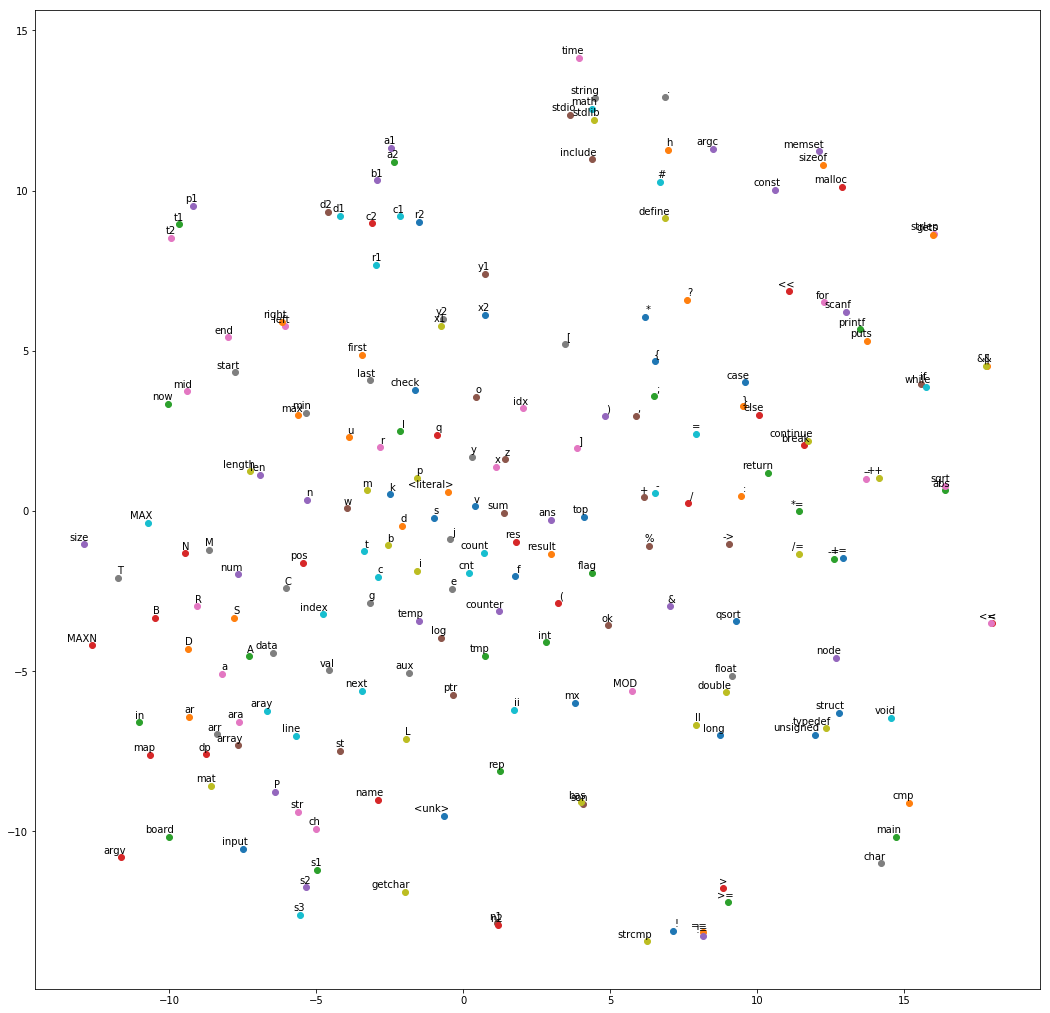

In [7]:
def plot_with_labels(low_dim_embs, labels, filename):
  assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

  plt.savefig(filename)

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
plot_only = 200
low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
labels = [reverse_dictionary[i] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels, 'wtf1.png')

In [21]:
np.save('java_w2v', final_embeddings)

In [2]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import *
from keras.models import Model, load_model
from keras.initializers import Constant, TruncatedNormal
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras_self_attention import SeqSelfAttention

from sklearn.utils import shuffle

Using TensorFlow backend.


In [3]:
final_embeddings = np.load('emb_cf.npy')

In [4]:
print(final_embeddings)

[[-0.01911858  0.05870199  0.1279324  ... -0.07122297  0.01111951
   0.14354645]
 [-0.10888187 -0.14547035  0.13939668 ...  0.04911415 -0.07483245
   0.17395225]
 [ 0.07718284 -0.20328972  0.1557233  ...  0.04644388 -0.04996643
   0.06292078]
 ...
 [-0.13562872 -0.06660749 -0.16431868 ... -0.20520489 -0.12260135
   0.16119818]
 [ 0.0013868  -0.0943331   0.09849874 ...  0.06596977  0.03272343
   0.0674391 ]
 [-0.19290452 -0.02437189 -0.10397366 ... -0.07656908 -0.0364498
  -0.14693195]]


In [8]:
import pickle

In [9]:
f = open("cf_data.pkl" , "rb")
[sent1, sent2, label] = pickle.load(f)

assert len(sent1) == len(sent2) and len(sent2) == len(label)

print(len(sent1))

8224


In [5]:
f2 = open("bugs_test.pickle" , "rb")
[s1, s2, lbl] = pickle.load(f2)

lbl = to_categorical(np.asarray(lbl))
s1 = pad_sequences(s1, maxlen=128)
s2 = pad_sequences(s2, maxlen=128)

s1, s2, lbl = shuffle(s1, s2, lbl)

In [15]:
X_test = get_rnn_data(s1, s2)
Y_test = lbl

In [10]:
def get_rnn_data(a,b):
    x = {
        'sentence1': a,
        #
        'sentence2': b,
        }
    return x

In [6]:
ccc = 0
ddd = 0
for _ in sent1:
    for __ in _:
        if __ == 0:
            ccc += 1
        else: ddd += 1
print(ccc, ddd)

0 1703234


In [11]:
#print(label)

label = to_categorical(np.asarray(label))
sent1 = pad_sequences(sent1, maxlen=128)
sent2 = pad_sequences(sent2, maxlen=128)

sent1, sent2, label = shuffle(sent1, sent2, label)

In [12]:
X_train = get_rnn_data(sent1[:4800],sent2[:4800])
Y_train = label[:4800]
X_valid = get_rnn_data(sent1[4800:6400],sent2[4800:6400])
Y_valid = label[4800:6400]
print(label)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [13]:
X_test = get_rnn_data(sent1[6400:], sent2[6400:])
Y_test = label[6400:]

In [ ]:
sent1, sent2, label = shuffle()

In [14]:
X_train

{'sentence1': array([[  0,   0,   0, ...,   9,   8,   2],
        [  0,   0,   0, ...,   1,   4,   2],
        [  0,   0,   0, ...,   9,   1,   2],
        ...,
        [  0,   0,   0, ...,   6,   4,  10],
        [  0,   0,   0, ...,  25, 481,   2],
        [  0,   0,   0, ...,  46,  39,   4]]),
 'sentence2': array([[11, 33, 10, ...,  4,  2, 11],
        [ 1,  2, 16, ...,  1,  2, 11],
        [54,  1,  4, ...,  1,  2, 11],
        ...,
        [ 0,  0,  0, ...,  1,  2, 11],
        [ 2, 17, 13, ...,  4,  2, 11],
        [ 5, 37, 20, ...,  1,  2, 11]])}

In [23]:
MAX_SEQUENCE_LENGTH = 128
EMBEDDING_DIM = 64
VOCABULARY_SIZE = 100000

embedding_layer = Embedding(VOCABULARY_SIZE,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(final_embeddings),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

def model_cnn(x):
    filter_sizes = [1,2,3,5]
    num_filters = 128

    x = Reshape((128, 64, 1))(x)

    maxpool_pool = []
    for i in range(len(filter_sizes)):
        conv = Conv2D(num_filters, kernel_size=(filter_sizes[i], 64),
                                     kernel_initializer='he_normal', activation='relu')(x)
        maxpool_pool.append(MaxPool2D(pool_size=(128 - filter_sizes[i] + 1, 1))(conv))

    z = Concatenate(axis=1)(maxpool_pool)   
    z = Flatten()(z)
    z = Dropout(0.2)(z)

    return z

def LSTMAttn(x, col):
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    u1 = SeqSelfAttention(attention_activation='sigmoid')(x)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    u2 = SeqSelfAttention(attention_activation='sigmoid')(x)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    u3 = SeqSelfAttention(attention_activation='sigmoid')(x)
    x = Bidirectional(CuDNNLSTM(128, return_sequences=True))(x)
    u4 = SeqSelfAttention(attention_activation='sigmoid')(x)
    
    x = concatenate([u1, u2, u3, u4])
    return x

inp1 = Input(shape=(128,), dtype='int32', name="sentence1")
inp2 = Input(shape=(128,), dtype='int32', name="sentence2")
emb1 = embedding_layer(inp1)
emb2 = embedding_layer(inp2)

x = concatenate([LSTMAttn(emb1, "sent1"), LSTMAttn(emb2, "sent2")])
#x = concatenate([model_cnn(emb1), model_cnn(emb2)])
x = Flatten()(x)
preds = Dense(2, activation='sigmoid', name='densejoke')(x)
model = Model(inputs=[inp1,inp2], outputs=preds)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.5,
                                            min_lr=0.00001)
file_path="checkpoint_codeforces_weights.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max', save_weights_only=True)
early = EarlyStopping(monitor="val_acc", mode="max", patience=3)

model_callbacks = [checkpoint, early, learning_rate_reduction]

In [11]:
model.load_weights(file_path)

In [25]:
model.fit(X_train, Y_train,
      batch_size=10,
      epochs=30,
      verbose=1,
      validation_data=(X_valid, Y_valid),
      callbacks = model_callbacks
     )

Train on 4800 samples, validate on 1600 samples
Epoch 1/30
4800/4800 [==============================] - 91s 19ms/step - loss: 0.7030 - acc: 0.4860 - val_loss: 0.6931 - val_acc: 0.4956

Epoch 00001: val_acc improved from -inf to 0.49563, saving model to checkpoint_codeforces_weights.hdf5
Epoch 2/30
4800/4800 [==============================] - 89s 19ms/step - loss: 0.6931 - acc: 0.4881 - val_loss: 0.6931 - val_acc: 0.5000

Epoch 00002: val_acc improved from 0.49563 to 0.50000, saving model to checkpoint_codeforces_weights.hdf5
Epoch 3/30
4800/4800 [==============================] - 90s 19ms/step - loss: 0.6931 - acc: 0.4902 - val_loss: 0.6931 - val_acc: 0.4975

Epoch 00003: val_acc did not improve from 0.50000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 4/30
4800/4800 [==============================] - 90s 19ms/step - loss: 0.6931 - acc: 0.4902 - val_loss: 0.6931 - val_acc: 0.5013

Epoch 00004: val_acc improved from 0.50000 to 0.50125, saving mo

In [26]:
model.evaluate(X_test, Y_test, batch_size=10)

1824/1824 [==============================] - 14s 8ms/step


[0.6931471709619489, 0.4901315849356092]

In [14]:
model.metrics_names

['loss', 'acc']

In [33]:
Y_nasha = model.predict(X_test, batch_size=64)

In [34]:
Y_nasha = np.argmax(Y_nasha,axis=1)

In [35]:
Y_test_nasha = np.argmax(Y_test, axis=1)

In [36]:
def count0(l):
    r = 0
    for _ in l:
        if _ == 0: r += 1
    return r * 1.0 / len(l)

In [37]:
ssb = []

for i, (x, y) in enumerate(zip(Y_nasha, Y_test_nasha)):
    if x != y:
        ssb.append(count0(X_test['sentence1'][i]))
        ssb.append(count0(X_test['sentence2'][i]))
        


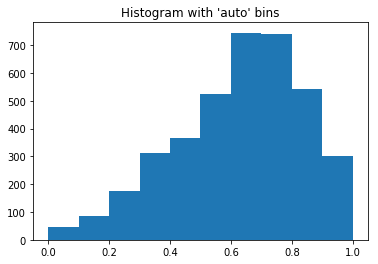

In [38]:
import matplotlib.pyplot as plt

plt.hist(ssb,  bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

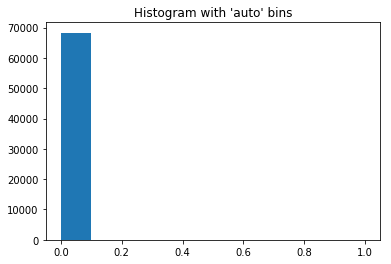

In [43]:
kkb = []

for i, (x, y) in enumerate(zip(sent1, sent2)):
    kkb.append(count0(x))
    kkb.append(count0(y))

plt.hist(kkb,  bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()    